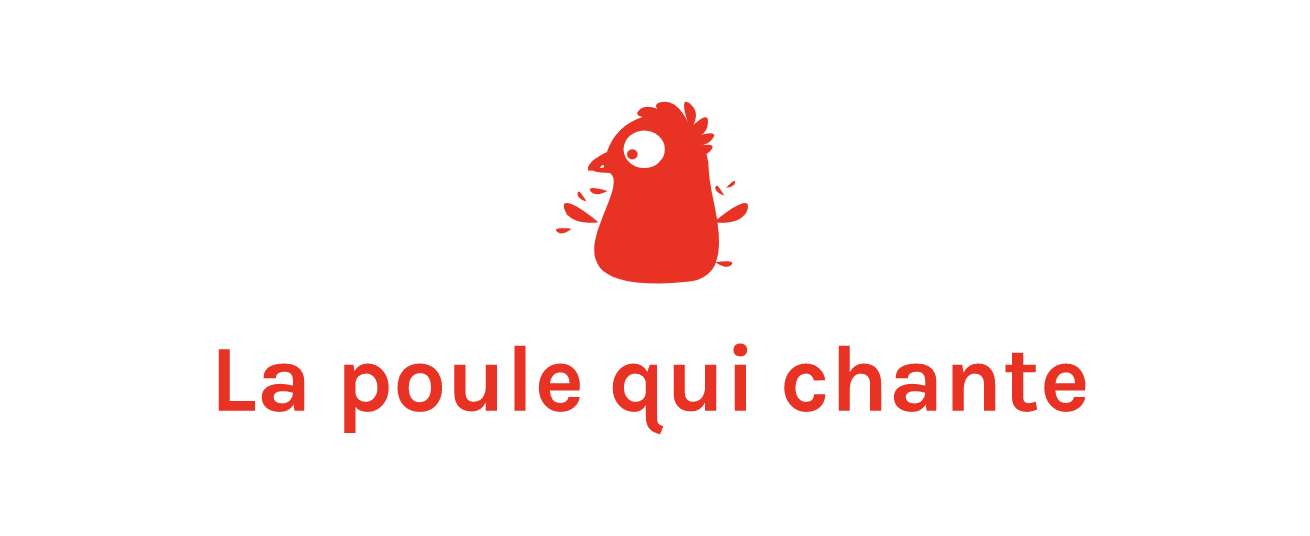

# Produisez une étude de marché avec R ou Python

Dans le cadre de sa prochaine internationalisation, *La poule qui chante*, entreprise française d'agroalimentaire, a besoin d'une première analyse sur les groupements de pays qui pourraient être ciblés pour exporter ses poulets.

Afin de débuter cette analyse, nous devons commencer ici par identifier les critères pertinents de l'analyse PESTEL et récoltons les données sur le site de la [FAO](https://www.fao.org/faostat/fr/#data/) mais également sur le site de la [banque mondiale](https://donnees.banquemondiale.org/).

Nous décidons d'analyser les critères suivants pour l'ensemble des pays disponibles sur l'année 2019:

- **Economiques**:
    - Croissance annuelle du PIB (en %)
    - PIB par habitant (en USD)
    - Taux de chômage
    - Taux d'inflation
    - Indice de facilité des affaires (permet de s'asssurer que l'environnement réglementaire du pays est favorable aux activités commerciales.)


- **Démographiques**:
    - Evolution de la population sur 3 ans (en %)


- **Sectoriels**:
    - Nourriture (quantité de viandes de volaille (en milliers de tonnes) disponible pour la consommation humaine)
    - Evolution de la quantité de viandes de volaille disponible pour la consommation humaine sur 3 ans (en %) 
    - Importations de viandes de volaille (en milliers de tonnes)
    - Production de viandes de volaille (en milliers de tonnes)


<h1>Table des matières<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importation-des-librairies" data-toc-modified-id="Importation-des-librairies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importation des librairies</a></span></li><li><span><a href="#Importation-des-données" data-toc-modified-id="Importation-des-données-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importation des données</a></span></li><li><span><a href="#Analyse-&amp;-nettoyage-des-données" data-toc-modified-id="Analyse-&amp;-nettoyage-des-données-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analyse &amp; nettoyage des données</a></span><ul class="toc-item"><li><span><a href="#Données-FAO" data-toc-modified-id="Données-FAO-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Données FAO</a></span></li><li><span><a href="#Données-de-la-banque-mondiale" data-toc-modified-id="Données-de-la-banque-mondiale-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Données de la banque mondiale</a></span></li><li><span><a href="#Données-finalisées-avant-analyse" data-toc-modified-id="Données-finalisées-avant-analyse-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Données finalisées avant analyse</a></span></li><li><span><a href="#Analyse-des-données" data-toc-modified-id="Analyse-des-données-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Analyse des données</a></span></li><li><span><a href="#Nettoyage-des-données" data-toc-modified-id="Nettoyage-des-données-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Nettoyage des données</a></span></li><li><span><a href="#Distribution-des-variables" data-toc-modified-id="Distribution-des-variables-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Distribution des variables</a></span></li></ul></li></ul></div>

## Importation des librairies

In [1]:
#Chargement des différentes librairies
import numpy as np
print('numpy: {}'.format(np.__version__))
import pandas as pd
print('pandas: {}'.format(pd.__version__))
import matplotlib as plt
print('matplotlib: {}'.format(plt.__version__))
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))
import scipy as st
print('scipy: {}'.format(st.__version__))
import sklearn as sk
print('sklearn: {}'.format(st.__version__))
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA


#Thème pour Seaborn
sns.set_theme(style="darkgrid", palette="pastel")

%run functions.py
#Chargement de mes fonctions perso

numpy: 1.20.3
pandas: 1.3.4
matplotlib: 3.4.3
seaborn: 0.11.2
scipy: 1.7.1
sklearn: 1.7.1


**Version des librairies utilisées:**

- numpy: 1.20.3
- pandas: 1.3.4
- matplotlib: 3.4.3
- seaborn: 0.11.2
- scipy: 1.7.1
- sklearn: 1.7.1

## Importation des données

Nous commençons donc par récupérer les données mentionnées plus haut sur le site de la FAO à travers 5 datasets au format CSV. Le dernier dataset contient les codes pays et nous permettra de faire le lien pour récupérer les données de la banque mondiale.

In [2]:
#Importation des données de la FAO
Input_population19 = pd.read_csv('Data/2019/pop19.csv')
Input_population16 = pd.read_csv('Data/2019/pop16.csv')
Input_economie = pd.read_csv('Data/2019/eco19.csv')
Input_sectoriel = pd.read_csv('Data/2019/sectoriel19.csv')
Input_conso_volailles16 = pd.read_csv('Data/2019/conso_volailles16.csv')

#Importation des codes pays
Input_code_pays = pd.read_excel('Data/2019/codepays.xlsx')

#Importation des données de la banque mondiale
Input_chomage = pd.read_excel('Data/2019/chomage.xls')
Input_indice = pd.read_excel('Data/2019/indice_affaires.xls')
Input_inflation = pd.read_excel('Data/2019/inflation.xls')


#Création des output (permet de revenir aux valeurs d'origine si besoin)
pop19 = Input_population19.copy()
pop16 = Input_population16.copy()
eco19 = Input_economie.copy()
sectoriel19 = Input_sectoriel
conso_volailles16 = Input_conso_volailles16.copy()
code_pays = Input_code_pays.copy()
chomage = Input_chomage.copy()
indice_affaires = Input_indice.copy()
inflation = Input_inflation.copy()

## Analyse & nettoyage des données

### Données FAO

Après une première visualisation des 5 datasets, on observe que la structure des colonnes est très similaire sur les 5 jeux de données.

In [3]:
#Visualisation du nom des colonnes de nos 5 datasets et du nombre de colonnes
print(pop19.columns)
print(pop19.shape[1])
print("-"*20)
print(pop16.columns)
print(pop16.shape[1])
print("-"*20)
print(eco19.columns)
print(eco19.shape[1])
print("-"*20)
print(sectoriel19.columns)
print(sectoriel19.shape[1])
print("-"*20)
print(conso_volailles16.columns)
print(conso_volailles16.shape[1])

Index(['Code Domaine', 'Domaine', 'Code zone (M49)', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole', 'Note'],
      dtype='object')
15
--------------------
Index(['Code Domaine', 'Domaine', 'Code zone (M49)', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole', 'Note'],
      dtype='object')
15
--------------------
Index(['Code Domaine', 'Domaine', 'Code zone (M49)', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole', 'Note'],
      dtype='object')
15
--------------------
Index(['Code Domaine', 'Domaine', 'Code zone (M49)', 'Zone', 'Code Élément',
       'Élément', 'Code Produit (CPC)', 'Produit', 'Code année', 'Année',
       'Unité', 'Valeur', 'Symbole', 'Description du Symbole

On observe qu'il y a uniquement des différences mineures entre les colonnes des 5 datasets.

- Le nom de la colonne 'Code Produit' est 'Code Produit (CPC)' dans les df sectoriel19 et conso_volailles16
- Les df pop19, pop16 et eco19 ont tout deux une colonne supplémentaire 'Note' qui n'a pas d'intérêt pour notre analyse

Afin de gagner du temps et d'éviter de multiples jointures, nous décidons d'opter pour une harmonisation des colonnes en vue d'une concaténation des données puis d'effectuer une agrégation sous forme de PIVOT TABLE.

In [4]:
#Modification du nom des colonnes
sectoriel19.rename(columns={'Code Produit (CPC)': 'Code Produit'},inplace=True)
conso_volailles16.rename(columns={'Code Produit (CPC)': 'Code Produit'},inplace=True)

#Suppression des colonnes inutiles dans les 3 df concernés
pop19.drop(columns="Note",inplace=True)
pop16.drop(columns="Note",inplace=True)
eco19.drop(columns="Note",inplace=True)

In [5]:
#Vérification du nom des colonnes de nos 5 datasets et du nombre de colonnes
print(pop19.columns)
print(pop19.shape[1])
print("-"*20)
print(pop16.columns)
print(pop16.shape[1])
print("-"*20)
print(eco19.columns)
print(eco19.shape[1])
print("-"*20)
print(sectoriel19.columns)
print(sectoriel19.shape[1])
print("-"*20)
print(conso_volailles16.columns)
print(conso_volailles16.shape[1])

Index(['Code Domaine', 'Domaine', 'Code zone (M49)', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole'],
      dtype='object')
14
--------------------
Index(['Code Domaine', 'Domaine', 'Code zone (M49)', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole'],
      dtype='object')
14
--------------------
Index(['Code Domaine', 'Domaine', 'Code zone (M49)', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole'],
      dtype='object')
14
--------------------
Index(['Code Domaine', 'Domaine', 'Code zone (M49)', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole'],
      dtype='object')
14
-

Après vérification, les données sont maintenant prêtes pour être concaténées puis mise sous forme de PIVOT TABLE.

In [6]:
#Concaténation des 3 df initiaux
df_final = pd.concat([pop19, eco19, sectoriel19])

#Aggrégation des données
df_final = df_final.pivot_table(index=['Zone'], columns='Élément', values='Valeur').reset_index()

In [7]:
#Pour plus de clarté, nous modifions le nom de certaines colonnes
df_final.rename(columns={'Croissance annuelle US$': 'Croissance annuelle PIB (en %)',
                         'Exportations - Quantité': 'Exportations',
                         'Importations - Quantité': 'Importations',
                         'Population totale': 'Population (2019)',
                         'Valeur US $ par habitant': 'PIB par habitant (en USD)'},inplace=True)

#Conversion des unités de population
df_final["Population (2019)"] = df_final["Population (2019)"] * 1000

#On arrondit certaines données à 2 décimales
df_final["Croissance annuelle PIB (en %)"] = round(df_final["Croissance annuelle PIB (en %)"],2)
df_final["PIB par habitant (en USD)"] = round(df_final["PIB par habitant (en USD)"],2)
df_final.head()

Élément,Zone,Croissance annuelle PIB (en %),Importations,Nourriture,Population (2019),Production,PIB par habitant (en USD)
0,Afghanistan,2.64,44.0,69.0,37769499.0,28.0,496.94
1,Afrique du Sud,-4.53,488.0,2178.0,58087055.0,1816.0,6001.39
2,Albanie,1.61,22.0,35.0,2873883.0,13.0,5345.60
3,Algérie,-2.43,0.0,280.0,42705368.0,285.0,3975.52
4,Allemagne,-2.24,831.0,1445.0,83148141.0,1544.0,46557.28


In [8]:
#On récupérer les données de population en 2016 pour calculer l'évolution
pop16 = pop16[['Zone','Valeur']]

#Jointure avec le df_final
df_final = pd.merge(df_final, pop16, on="Zone", how='outer')

#On renomme la colonne
df_final.rename(columns={'Valeur': 'Population (2016)'},inplace=True)

#Conversion des unités de population
df_final['Population (2016)'] = df_final['Population (2016)'] * 1000

#On calcule le % d'évolution entre 2016 et 2019 dans notre df_final
df_final["%Evolution pop"] = round(((df_final["Population (2019)"] / df_final["Population (2016)"]) - 1)*100,2)
df_final.head()

,Zone,Croissance annuelle PIB (en %),Importations,Nourriture,Population (2019),Production,PIB par habitant (en USD),Population (2016),%Evolution pop
0,Afghanistan,2.64,44.0,69.0,37769499.0,28.0,496.94,34636207.0,9.05
1,Afrique du Sud,-4.53,488.0,2178.0,58087055.0,1816.0,6001.39,56422274.0,2.95
2,Albanie,1.61,22.0,35.0,2873883.0,13.0,5345.60,2881063.0,-0.25
3,Algérie,-2.43,0.0,280.0,42705368.0,285.0,3975.52,40339329.0,5.87
4,Allemagne,-2.24,831.0,1445.0,83148141.0,1544.0,46557.28,82331423.0,0.99


In [9]:
#On récupérer les données de nourriture en 2016 pour calculer l'évolution
conso_volailles16 = conso_volailles16[['Zone','Valeur']]

#Jointure avec le df_final
df_final = pd.merge(df_final, conso_volailles16, on="Zone", how='outer')

#On renomme les colonnes
df_final.rename(columns={'Valeur': 'Nourriture (2016)',
                         'Nourriture':'Nourriture (2019)'},inplace=True)

#On calcule le % d'évolution entre 2016 et 2019 dans notre df_final
df_final["%Evolution nourriture"] = round(((df_final["Nourriture (2019)"] / df_final["Nourriture (2016)"]) - 1)*100,2)
df_final.head()

,Zone,Croissance annuelle PIB (en %),Importations,Nourriture (2019),Population (2019),Production,PIB par habitant (en USD),Population (2016),%Evolution pop,Nourriture (2016),%Evolution nourriture
0,Afghanistan,2.64,44.0,69.0,37769499.0,28.0,496.94,34636207.0,9.05,69.0,0.00
1,Afrique du Sud,-4.53,488.0,2178.0,58087055.0,1816.0,6001.39,56422274.0,2.95,2066.0,5.42
2,Albanie,1.61,22.0,35.0,2873883.0,13.0,5345.60,2881063.0,-0.25,39.0,-10.26
3,Algérie,-2.43,0.0,280.0,42705368.0,285.0,3975.52,40339329.0,5.87,294.0,-4.76
4,Allemagne,-2.24,831.0,1445.0,83148141.0,1544.0,46557.28,82331423.0,0.99,1474.0,-1.97


In [10]:
#On ajoute les codes pays qui nous permettront de faire le lien avec les données de la banque mondiale
df_final = pd.merge(df_final, code_pays, on="Zone", how='outer')
df_final.head()

,Zone,Croissance annuelle PIB (en %),Importations,Nourriture (2019),Population (2019),Production,PIB par habitant (en USD),Population (2016),%Evolution pop,Nourriture (2016),%Evolution nourriture,Code Pays
0,Afghanistan,2.64,44.0,69.0,37769499.0,28.0,496.94,34636207.0,9.05,69.0,0.00,AFG
1,Afrique du Sud,-4.53,488.0,2178.0,58087055.0,1816.0,6001.39,56422274.0,2.95,2066.0,5.42,ZAF
2,Albanie,1.61,22.0,35.0,2873883.0,13.0,5345.60,2881063.0,-0.25,39.0,-10.26,ALB
3,Algérie,-2.43,0.0,280.0,42705368.0,285.0,3975.52,40339329.0,5.87,294.0,-4.76,DZA
4,Allemagne,-2.24,831.0,1445.0,83148141.0,1544.0,46557.28,82331423.0,0.99,1474.0,-1.97,DEU


In [11]:
#Suppression des colonnes inutiles qui ont été utilisées pour construire des variables
df_final.drop(columns= ["Population (2019)",
                        "Population (2016)",
                        "Nourriture (2016)"], inplace=True)

### Données de la banque mondiale

In [12]:
#On renomme les colonnes du df chomage
chomage.rename(columns={'2019': 'Taux Chômage',
                        'Country Code':'Code Pays'},inplace=True)

#Jointure pour ajouter les données de taux de chomage à partir de la clé Code Pays
df_final = pd.merge(df_final, chomage[["Code Pays", "Taux Chômage"]], on="Code Pays", how='left')

#On arrondit les données du taux de chomage à 2 décimales
df_final["Taux Chômage"] = round(df_final["Taux Chômage"],2)
df_final.head()

,Zone,Croissance annuelle PIB (en %),Importations,Nourriture (2019),Production,PIB par habitant (en USD),%Evolution pop,%Evolution nourriture,Code Pays,Taux Chômage
0,Afghanistan,2.64,44.0,69.0,28.0,496.94,9.05,0.00,AFG,11.22
1,Afrique du Sud,-4.53,488.0,2178.0,1816.0,6001.39,2.95,5.42,ZAF,28.47
2,Albanie,1.61,22.0,35.0,13.0,5345.60,-0.25,-10.26,ALB,11.47
3,Algérie,-2.43,0.0,280.0,285.0,3975.52,5.87,-4.76,DZA,10.51
4,Allemagne,-2.24,831.0,1445.0,1544.0,46557.28,0.99,-1.97,DEU,3.14


In [13]:
#On renomme les colonnes du df indice_affaires
indice_affaires.rename(columns={'2019': 'Indice facilité des affaires',
                        'Country Code':'Code Pays'},inplace=True)

#Jointure pour ajouter les données de l'indice des affaires à partir de la clé Code Pays
df_final = pd.merge(df_final, indice_affaires[['Code Pays', 'Indice facilité des affaires']], on="Code Pays", how='left')
df_final.head()

,Zone,Croissance annuelle PIB (en %),Importations,Nourriture (2019),Production,PIB par habitant (en USD),%Evolution pop,%Evolution nourriture,Code Pays,Taux Chômage,Indice facilité des affaires
0,Afghanistan,2.64,44.0,69.0,28.0,496.94,9.05,0.00,AFG,11.22,173.0
1,Afrique du Sud,-4.53,488.0,2178.0,1816.0,6001.39,2.95,5.42,ZAF,28.47,84.0
2,Albanie,1.61,22.0,35.0,13.0,5345.60,-0.25,-10.26,ALB,11.47,82.0
3,Algérie,-2.43,0.0,280.0,285.0,3975.52,5.87,-4.76,DZA,10.51,157.0
4,Allemagne,-2.24,831.0,1445.0,1544.0,46557.28,0.99,-1.97,DEU,3.14,22.0


In [14]:
#On renomme les colonnes du df inflation
inflation.rename(columns={'2019': 'Taux Inflation',
                        'Country Code':'Code Pays'},inplace=True)

#Jointure pour ajouter les données de l'inflation à partir de la clé Code Pays
df_final = pd.merge(df_final, inflation[["Code Pays", "Taux Inflation"]], on="Code Pays", how='left')

#On arrondit les données de l'inflation à 2 décimales
df_final["Taux Inflation"] = round(df_final["Taux Inflation"],2)

### Données finalisées avant analyse

In [15]:
#Tri des colonnes
cols = ['Zone',
        'Nourriture (2019)',
        '%Evolution nourriture',
        'Production',
        'Importations',
        'Croissance annuelle PIB (en %)',
        'PIB par habitant (en USD)',
        'Taux Chômage',
        'Taux Inflation',
        'Indice facilité des affaires',
        '%Evolution pop']

# Utiliser la méthode reindex pour réorganiser l'ordre des colonnes
df_final = df_final.reindex(columns=cols)
df_final

,Zone,Nourriture (2019),%Evolution nourriture,Production,Importations,Croissance annuelle PIB (en %),PIB par habitant (en USD),Taux Chômage,Taux Inflation,Indice facilité des affaires,%Evolution pop
0,Afghanistan,69.0,0.00,28.0,44.0,2.64,496.94,11.22,2.30,173.0,9.05
1,Afrique du Sud,2178.0,5.42,1816.0,488.0,-4.53,6001.39,28.47,4.12,84.0,2.95
2,Albanie,35.0,-10.26,13.0,22.0,1.61,5345.60,11.47,1.41,82.0,-0.25
3,Algérie,280.0,-4.76,285.0,0.0,-2.43,3975.52,10.51,1.95,157.0,5.87
4,Allemagne,1445.0,-1.97,1544.0,831.0,-2.24,46557.28,3.14,1.45,22.0,0.99
...,...,...,...,...,...,...,...,...,...,...,...
230,Îles Salomon,4.0,33.33,0.0,4.0,-0.28,2344.13,0.75,1.63,136.0,7.47
231,Îles Turques-et-Caïques,NaN,NaN,NaN,NaN,7.57,31353.33,NaN,NaN,NaN,12.64
232,Îles Vierges américaines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.46
233,Îles Vierges britanniques,NaN,NaN,NaN,NaN,4.12,47913.52,NaN,NaN,NaN,2.93


### Analyse des données

In [16]:
#Structure du dataframe
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Zone                            235 non-null    object 
 1   Nourriture (2019)               186 non-null    float64
 2   %Evolution nourriture           180 non-null    float64
 3   Production                      184 non-null    float64
 4   Importations                    186 non-null    float64
 5   Croissance annuelle PIB (en %)  211 non-null    float64
 6   PIB par habitant (en USD)       211 non-null    float64
 7   Taux Chômage                    184 non-null    float64
 8   Taux Inflation                  173 non-null    float64
 9   Indice facilité des affaires    187 non-null    float64
 10  %Evolution pop                  235 non-null    float64
dtypes: float64(10), object(1)
memory usage: 22.0+ KB


In [17]:
#Vérification de potentiels outliers
df_final.describe()

,Nourriture (2019),%Evolution nourriture,Production,Importations,Croissance annuelle PIB (en %),PIB par habitant (en USD),Taux Chômage,Taux Inflation,Indice facilité des affaires,%Evolution pop
count,186.000000,180.000000,184.000000,186.000000,211.000000,211.000000,184.000000,173.000000,187.000000,235.000000
mean,800.881720,17.283000,838.070652,96.817204,2.071469,17896.004929,7.299457,5.282832,96.155080,3.538596
std,2812.666775,38.608498,2989.711909,226.024584,9.923643,27055.711336,5.684921,20.968821,55.042139,4.282970
min,1.000000,-92.310000,0.000000,0.000000,-27.850000,118.610000,0.100000,-3.230000,1.000000,-11.410000
25%,30.250000,1.177500,11.000000,3.000000,-1.610000,2302.095000,3.502500,0.770000,48.500000,0.610000
50%,106.500000,10.065000,71.500000,19.500000,1.490000,7027.690000,5.305000,2.100000,97.000000,3.370000
75%,323.500000,28.240000,344.000000,87.500000,4.120000,22608.935000,9.867500,3.700000,143.500000,6.250000
max,22644.000000,343.480000,22878.000000,1807.000000,103.160000,189506.770000,28.470000,255.300000,190.000000,22.780000


In [18]:
#Analyse du pourcentage de valeurs manquantes par colonne
df_final.isnull().mean()

Zone                              0.000000
Nourriture (2019)                 0.208511
%Evolution nourriture             0.234043
Production                        0.217021
Importations                      0.208511
Croissance annuelle PIB (en %)    0.102128
PIB par habitant (en USD)         0.102128
Taux Chômage                      0.217021
Taux Inflation                    0.263830
Indice facilité des affaires      0.204255
%Evolution pop                    0.000000
dtype: float64

In [19]:
#Ensemble des lignes avec des valeurs manquantes
df_final[df_final.isnull().any(axis=1)]

,Zone,Nourriture (2019),%Evolution nourriture,Production,Importations,Croissance annuelle PIB (en %),PIB par habitant (en USD),Taux Chômage,Taux Inflation,Indice facilité des affaires,%Evolution pop
5,Andorre,NaN,NaN,NaN,NaN,-1.97,40900.54,NaN,NaN,NaN,5.24
7,Anguilla,NaN,NaN,NaN,NaN,16.83,25336.58,NaN,NaN,NaN,3.83
8,Antigua-et-Barbuda,6.0,20.00,0.0,7.0,5.08,17376.11,NaN,1.43,113.0,1.71
10,Argentine,2021.0,5.04,2249.0,5.0,-13.94,9947.26,9.84,NaN,126.0,2.47
12,Aruba,NaN,NaN,NaN,NaN,3.37,31136.11,NaN,NaN,NaN,1.50
...,...,...,...,...,...,...,...,...,...,...,...
229,Îles Marshall,NaN,NaN,NaN,NaN,8.05,4076.16,NaN,NaN,153.0,-7.45
231,Îles Turques-et-Caïques,NaN,NaN,NaN,NaN,7.57,31353.33,NaN,NaN,NaN,12.64
232,Îles Vierges américaines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.46
233,Îles Vierges britanniques,NaN,NaN,NaN,NaN,4.12,47913.52,NaN,NaN,NaN,2.93


In [20]:
#Vérification des doublons
df_final[df_final.duplicated()].head()

,Zone,Nourriture (2019),%Evolution nourriture,Production,Importations,Croissance annuelle PIB (en %),PIB par habitant (en USD),Taux Chômage,Taux Inflation,Indice facilité des affaires,%Evolution pop


**Synthèse de l'analyse:**

- 11 colonnes (10 variables à étudier + la colonne "Zone")
- 235 pays dans notre df
- A l'exception de la colonne "%Evolution pop", toutes les colonnes présentes un certain % de valeurs manquantes
- Pas de doublons

La principale problématique provient des valeurs manquantes. 
Toutefois, lorsque l'on regarde de plus près, l'immense majorité concerne uniquement des "petits pays" à faible potentiel qui sont d'ailleurs parfois des territoires d'outre mer. Nous décidons de les supprimer en prévision des différentes analyses.

### Nettoyage des données

In [21]:
#On met les 82 pays présentant des valeurs manquantes dans un df
pays_exclus = df_final[df_final.isnull().any(axis=1)]
pays_exclus

,Zone,Nourriture (2019),%Evolution nourriture,Production,Importations,Croissance annuelle PIB (en %),PIB par habitant (en USD),Taux Chômage,Taux Inflation,Indice facilité des affaires,%Evolution pop
5,Andorre,NaN,NaN,NaN,NaN,-1.97,40900.54,NaN,NaN,NaN,5.24
7,Anguilla,NaN,NaN,NaN,NaN,16.83,25336.58,NaN,NaN,NaN,3.83
8,Antigua-et-Barbuda,6.0,20.00,0.0,7.0,5.08,17376.11,NaN,1.43,113.0,1.71
10,Argentine,2021.0,5.04,2249.0,5.0,-13.94,9947.26,9.84,NaN,126.0,2.47
12,Aruba,NaN,NaN,NaN,NaN,3.37,31136.11,NaN,NaN,NaN,1.50
...,...,...,...,...,...,...,...,...,...,...,...
229,Îles Marshall,NaN,NaN,NaN,NaN,8.05,4076.16,NaN,NaN,153.0,-7.45
231,Îles Turques-et-Caïques,NaN,NaN,NaN,NaN,7.57,31353.33,NaN,NaN,NaN,12.64
232,Îles Vierges américaines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.46
233,Îles Vierges britanniques,NaN,NaN,NaN,NaN,4.12,47913.52,NaN,NaN,NaN,2.93


In [22]:
#Suppression des pays avec valeurs manquantes
df_final.dropna(inplace=True)
#On passe les pays en index
df_final.set_index('Zone', inplace=True)

Nous décidons également de supprimer la France car l'entreprise est basée en France.

In [23]:
#Suppression de la France
df_final.drop(["France"],inplace=True)

In [24]:
#Nouvelle vérificaiton des valeurs manquantes
df_final.isnull().any()

Nourriture (2019)                 False
%Evolution nourriture             False
Production                        False
Importations                      False
Croissance annuelle PIB (en %)    False
PIB par habitant (en USD)         False
Taux Chômage                      False
Taux Inflation                    False
Indice facilité des affaires      False
%Evolution pop                    False
dtype: bool

In [25]:
df_final.shape

(152, 10)

Après cette première opération de nettoyage, il nous reste donc 152 pays.

### Distribution des variables

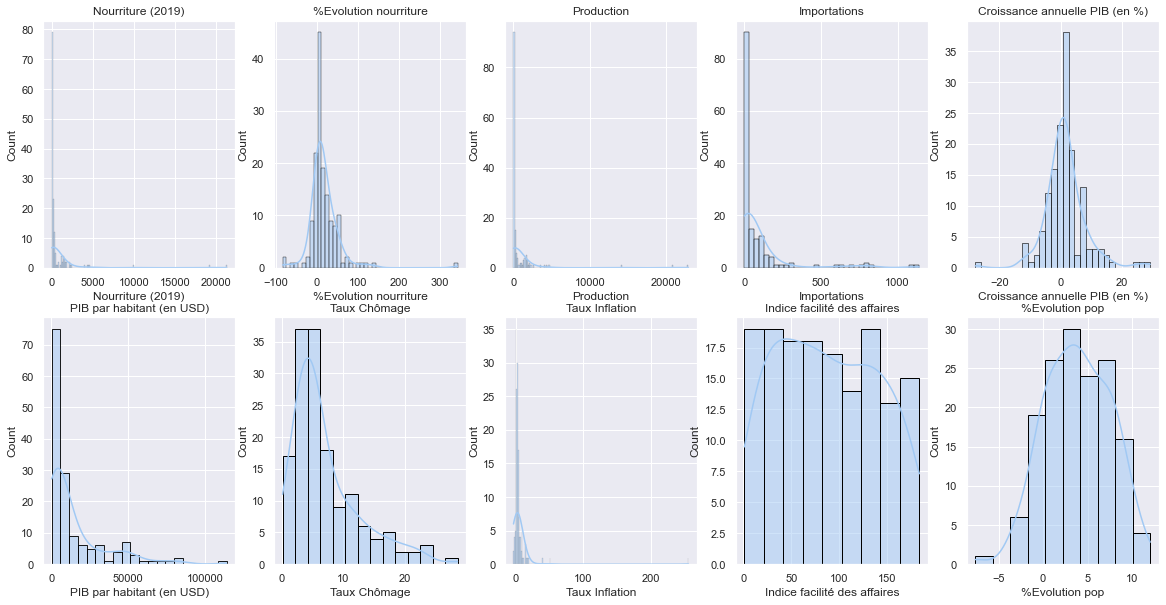

In [26]:
#Distribution des variables
plt.figure(figsize=(20,10))

for i, col in enumerate(df_final):
    plt.subplot(2, 5, i+1)
    sns.histplot(df_final[col],ec="black", kde=True)
    plt.title(col,fontsize=12)

plt.show()

Après analyse de nos différentes variables. Nous pouvons en conclure que la majorité des variables présentent des distributions très différentes les unes des autres. Il sera donc important de scaler nos données dans l'optique de réaliser les différentes opérations de clustering et d'analyse en composantes principales.

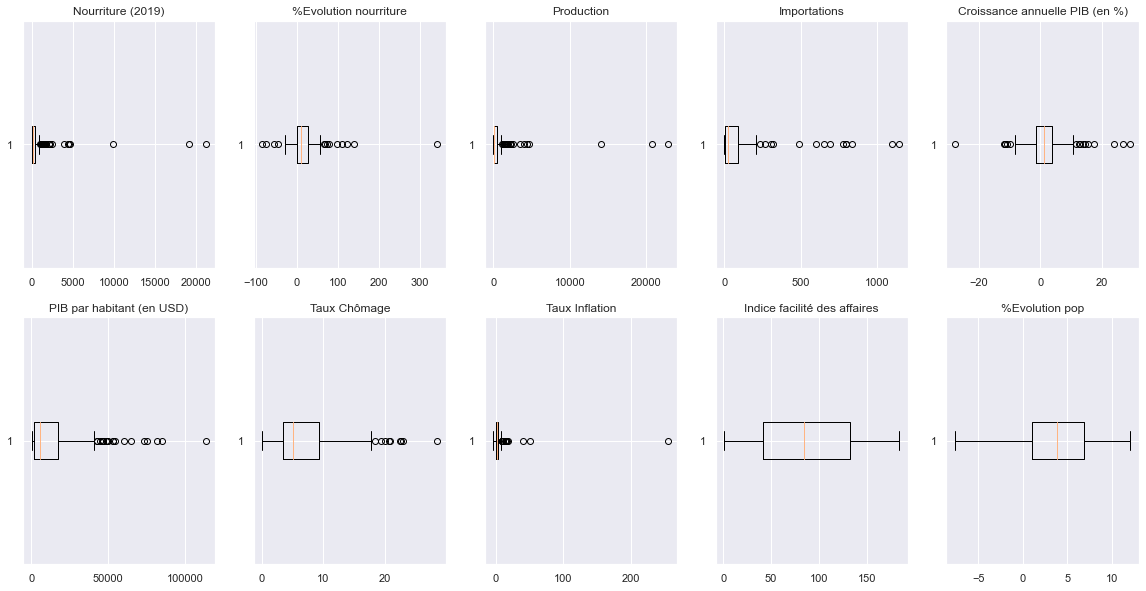

In [27]:
#Distribution des variables (boxplot)
plt.figure(figsize=(20,10))

for i, col in enumerate(df_final):
    plt.subplot(2, 5, i+1)
    plt.boxplot(df_final[col],vert=False)
    plt.title(col,fontsize=12)

plt.show()

In [28]:
#Vérification des outliers
for column in df_final.columns[:10]:
    print(find_outliers(df_final[column]))

La limite inférieure est de -453.75
La limite supérieure est de 872.25
Liste des outliers ---
                                                    Nourriture (2019)
Zone                                                                 
Afrique du Sud                                                 2178.0
Allemagne                                                      1445.0
Arabie saoudite                                                1412.0
Australie                                                      1240.0
Brésil                                                         9951.0
Canada                                                         1530.0
Chine, continentale                                           21282.0
Colombie                                                       1808.0
Espagne                                                        1558.0
Fédération de Russie                                           4572.0
Inde                                                           438

A ce stade, nous décidons d'exclure la Chine, le Brésil et les Etats-Unis de nos analyses. En effet, les 3 pays sont des outliers pouvant affecter significativement nos données. De plus, ces pays ne semblent pas pertinents pour une première expérience à l'international pour plusieurs raisons:

- Les données montrent une forte consommation intérieure mais surtout une forte production locale en matière de viandes de volailles (TOP 3 des producteurs mondiaux)
- Les spécificités culturelles propres à ces pays n'en font pas des candidats idéaux pour une entreprise qui souhaite exporter pour la première fois

In [29]:
#Suppression des pays outliers
df_final.drop(["Chine, continentale","États-Unis d'Amérique","Brésil"],inplace=True)

In [30]:
df_final

,Nourriture (2019),%Evolution nourriture,Production,Importations,Croissance annuelle PIB (en %),PIB par habitant (en USD),Taux Chômage,Taux Inflation,Indice facilité des affaires,%Evolution pop
Zone,,,,,,,,,,
Afghanistan,69.0,0.00,28.0,44.0,2.64,496.94,11.22,2.30,173.0,9.05
Afrique du Sud,2178.0,5.42,1816.0,488.0,-4.53,6001.39,28.47,4.12,84.0,2.95
Albanie,35.0,-10.26,13.0,22.0,1.61,5345.60,11.47,1.41,82.0,-0.25
Algérie,280.0,-4.76,285.0,0.0,-2.43,3975.52,10.51,1.95,157.0,5.87
Allemagne,1445.0,-1.97,1544.0,831.0,-2.24,46557.28,3.14,1.45,22.0,0.99
...,...,...,...,...,...,...,...,...,...,...
Égypte,1663.0,33.36,1630.0,36.0,27.07,3161.32,7.84,9.15,114.0,5.85
Émirats arabes unis,324.0,15.30,45.0,689.0,-1.18,42701.43,2.23,-1.93,16.0,2.42
Équateur,322.0,-5.01,322.0,0.0,0.51,6222.52,3.81,0.27,129.0,5.50


Nous avons donc ici une dataframe avec 149 pays et 10 variables nous permettant d'analyser les aspects marché, économique et démographique.